In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
import shap

In [3]:
# Load the dataset
file_path = "/content/retail_price.csv"
df = pd.read_csv(file_path)

# Show basic info and preview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [4]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [6]:
df.isnull().sum()

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [5]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


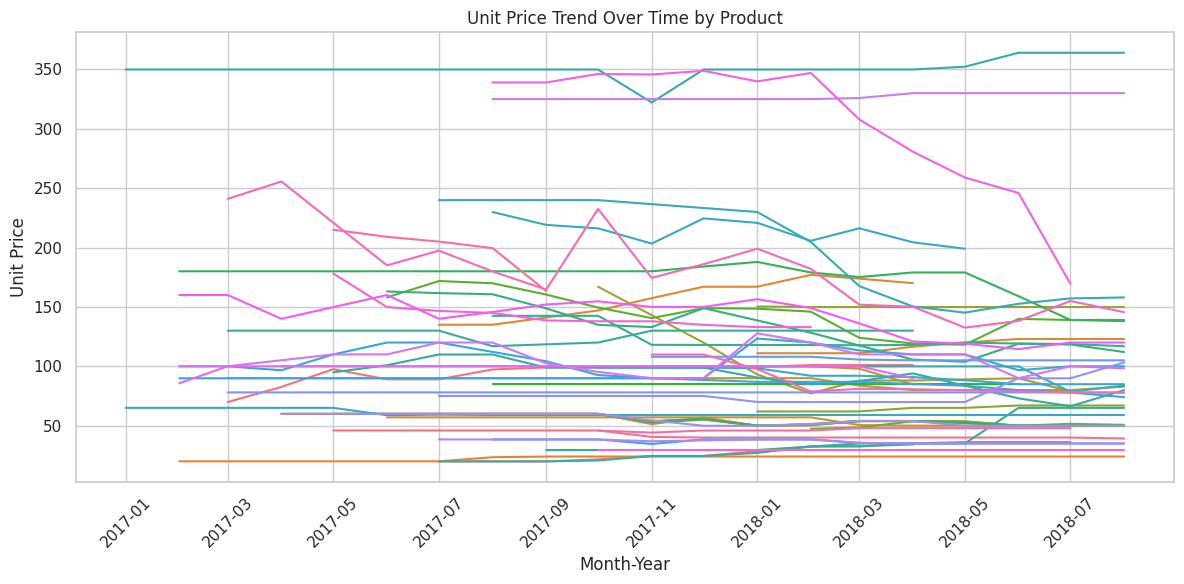

In [8]:
# Convert 'month_year' to datetime
df['month_year'] = pd.to_datetime(df['month_year'], format="%d-%m-%Y")

# Set plotting style
sns.set(style="whitegrid")

# 1. Pricing Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month_year', y='unit_price', hue='product_id', legend=False)
plt.title('Unit Price Trend Over Time by Product')
plt.xlabel('Month-Year')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


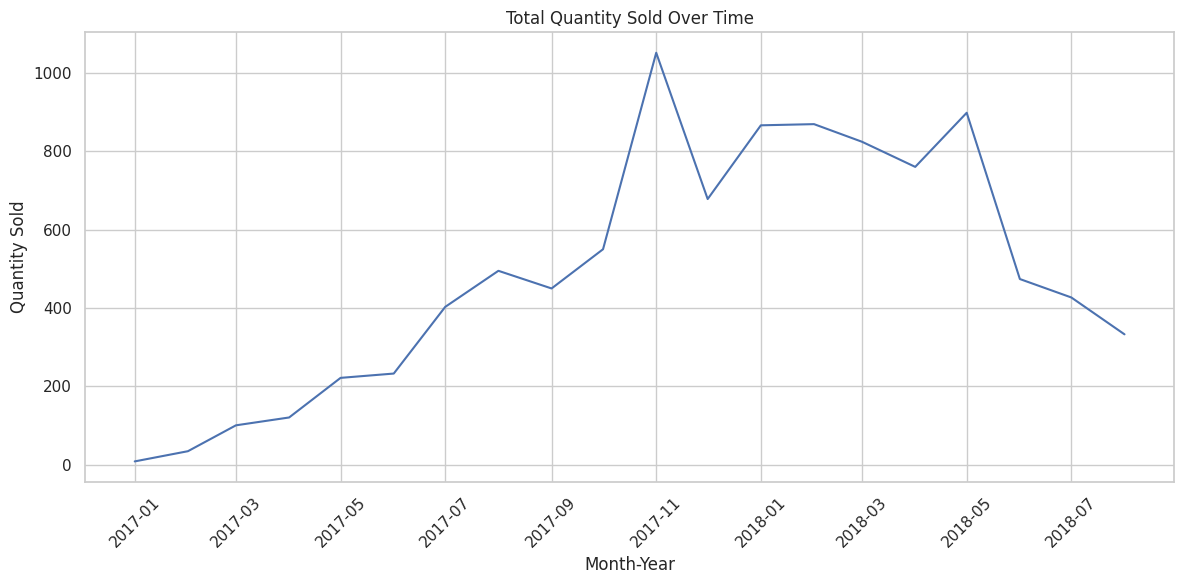

<ipython-input-9-be3748b2c836>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, y='product_category_name', x='total_price', palette='viridis')


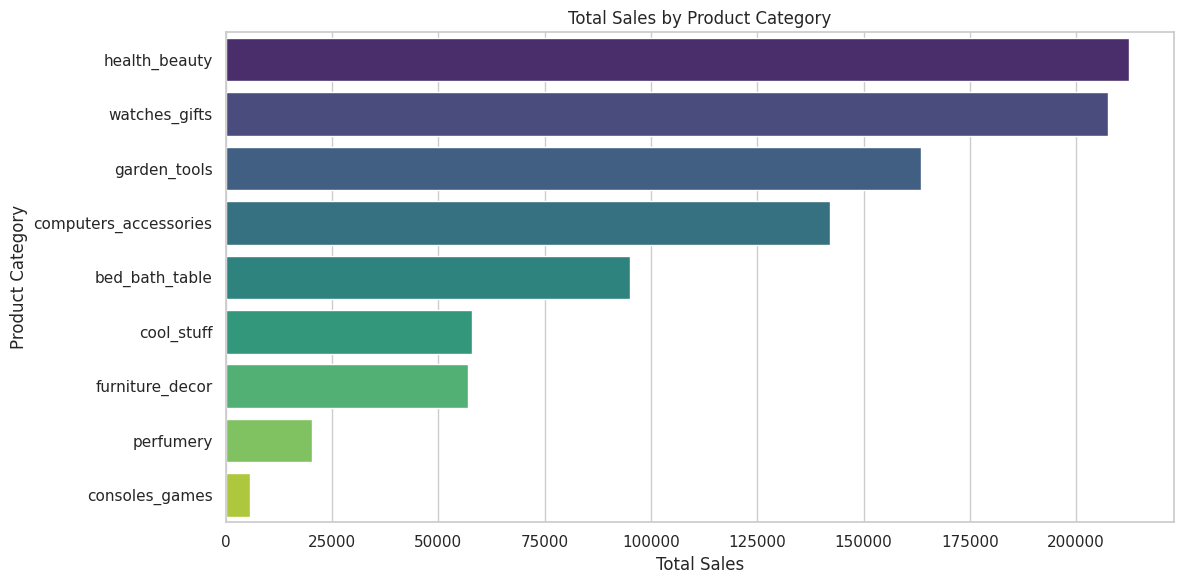

In [9]:
# 2. Sales Volume Over Time
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('month_year')['qty'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='month_year', y='qty')
plt.title('Total Quantity Sold Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Total Sales per Product Category
plt.figure(figsize=(12, 6))
category_sales = df.groupby('product_category_name')['total_price'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=category_sales, y='product_category_name', x='total_price', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


In [10]:
# Start Feature Engineering

# 1. Competitor Price Difference (Assuming competitor price is available in 'competitor_price' column if it exists)
if 'competitor_price' in df.columns:
    df['competitor_price_diff'] = df['unit_price'] - df['competitor_price']

# 2. Temporal Features
df['month'] = df['month_year'].dt.month
df['year'] = df['month_year'].dt.year
df['day_of_week'] = df['month_year'].dt.dayofweek

# 3. Price per unit quantity (if not already derived)
df['price_per_unit'] = df['total_price'] / df['qty']

# 4. Freight Ratio
df['freight_ratio'] = df['freight_price'] / df['total_price']

# Preview new features
df[['unit_price', 'total_price', 'freight_price', 'month', 'year', 'day_of_week', 'price_per_unit', 'freight_ratio']].head()


,unit_price,total_price,freight_price,month,year,day_of_week,price_per_unit,freight_ratio
0,45.95,45.95,15.100000,5,2017,0,45.95,0.328618
1,45.95,137.85,12.933333,6,2017,3,45.95,0.093822
2,45.95,275.70,14.840000,7,2017,5,45.95,0.053827
3,45.95,183.80,14.287500,8,2017,1,45.95,0.077734
4,45.95,91.90,15.100000,9,2017,4,45.95,0.164309


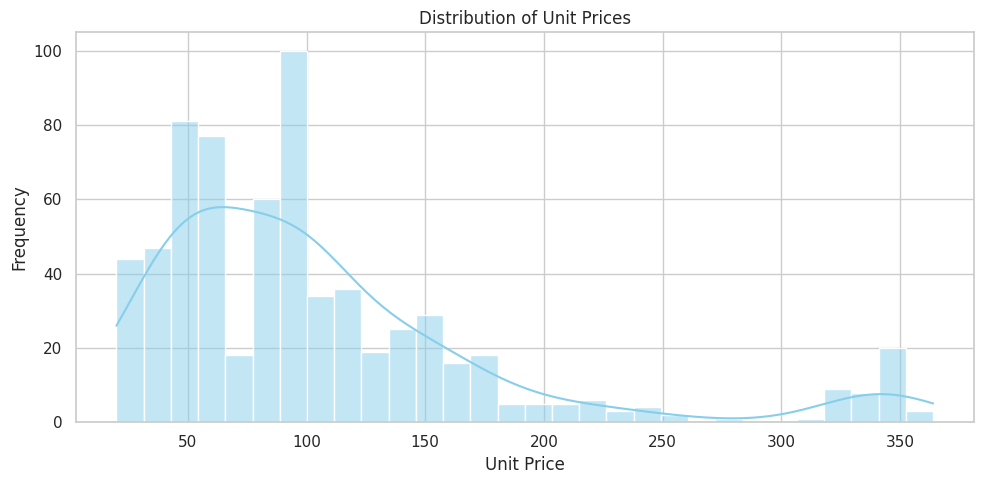

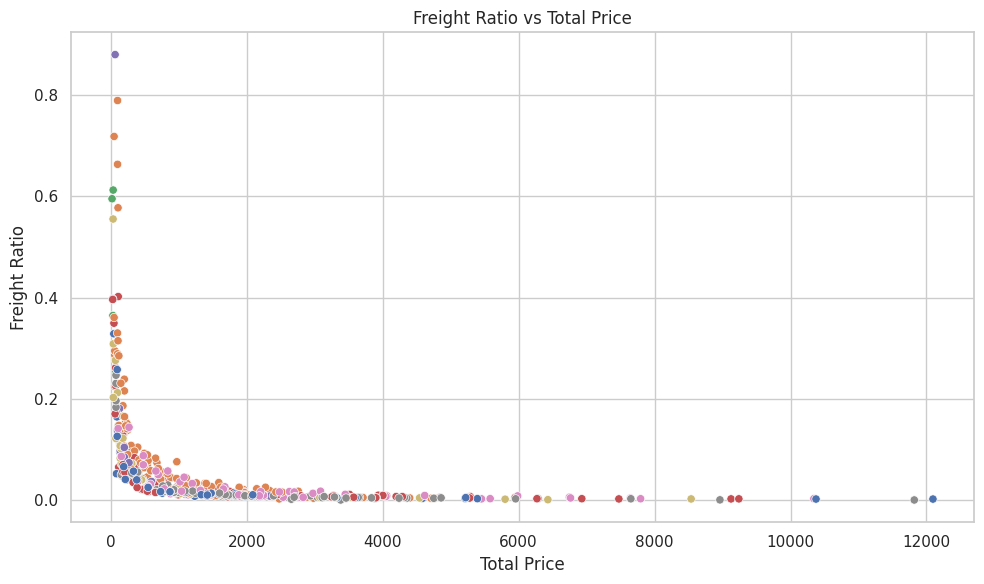

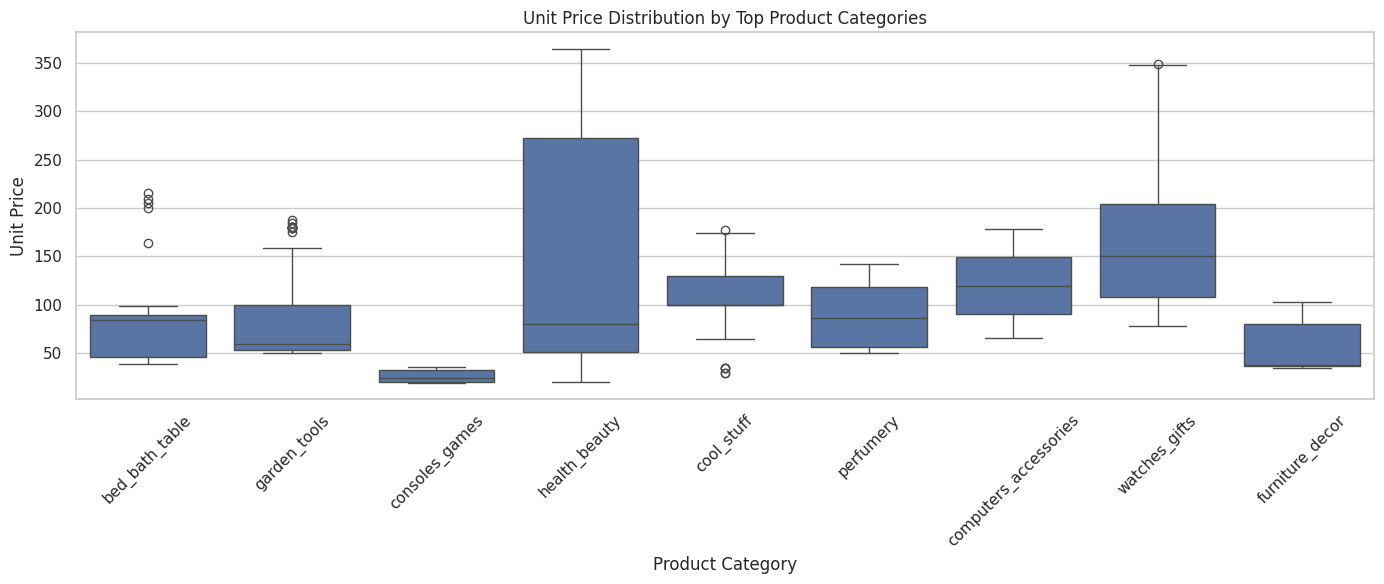

In [11]:
# More EDA Visualizations

# 1. Distribution of Unit Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['unit_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Freight Ratio vs Total Price (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_price', y='freight_ratio', hue='product_category_name', legend=False)
plt.title('Freight Ratio vs Total Price')
plt.xlabel('Total Price')
plt.ylabel('Freight Ratio')
plt.tight_layout()
plt.show()

# 3. Boxplot of Unit Price by Product Category
plt.figure(figsize=(14, 6))
top_categories = df['product_category_name'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['product_category_name'].isin(top_categories)],
            x='product_category_name', y='unit_price')
plt.title('Unit Price Distribution by Top Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


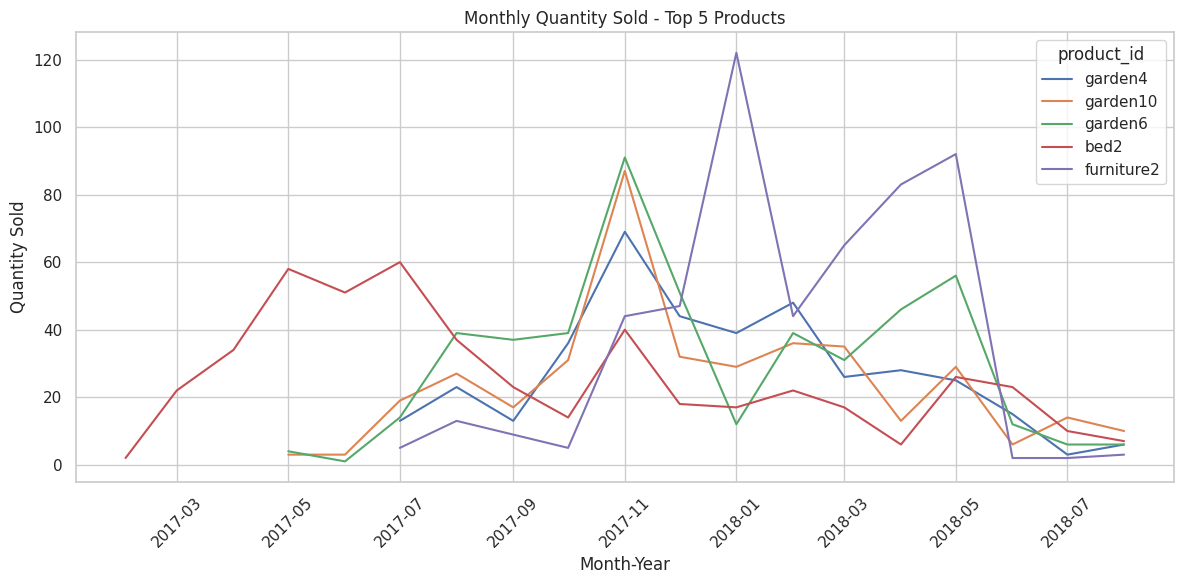

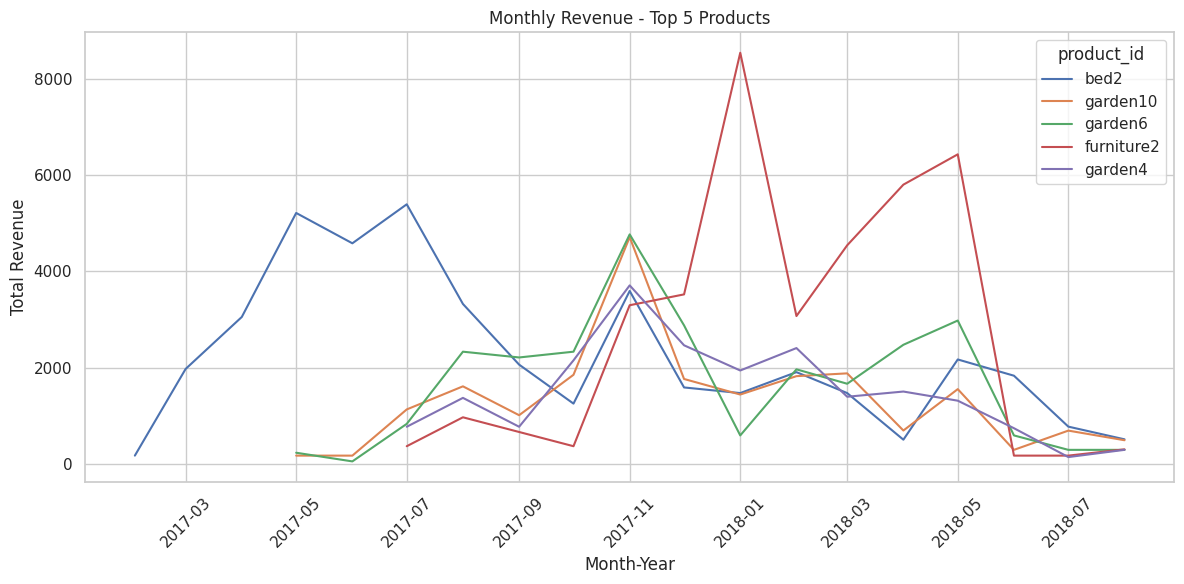

In [12]:
# Identify top 5 best-selling products by total quantity sold
top_products = df.groupby('product_id')['qty'].sum().nlargest(5).index

# Filter data for only these products
df_top_products = df[df['product_id'].isin(top_products)]

# 1. Monthly Sales Trends of Top 5 Products
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_products, x='month_year', y='qty', hue='product_id')
plt.title('Monthly Quantity Sold - Top 5 Products')
plt.xlabel('Month-Year')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Revenue Contribution of Top 5 Products Over Time
monthly_revenue = df_top_products.groupby(['month_year', 'product_id'])['total_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='month_year', y='total_price', hue='product_id')
plt.title('Monthly Revenue - Top 5 Products')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


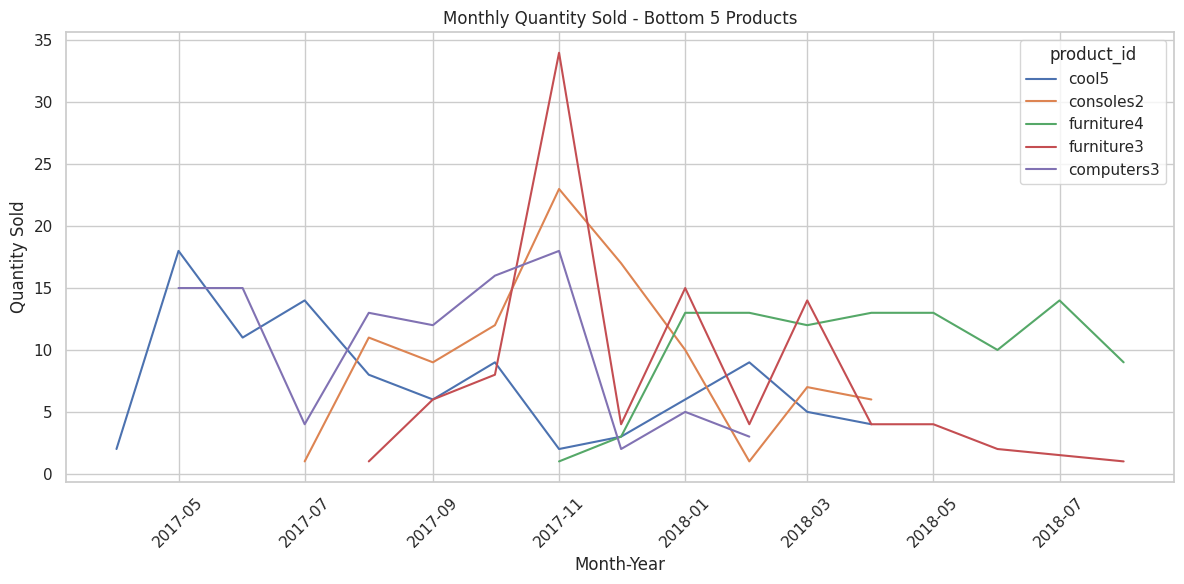

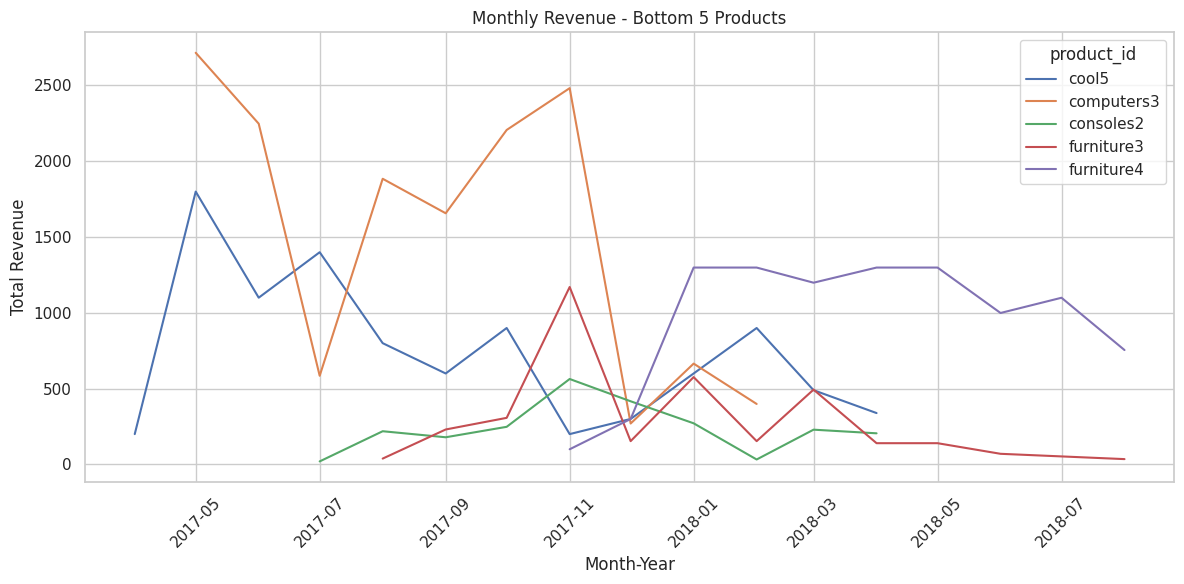

In [13]:
# Identify bottom 5 worst-selling products by total quantity sold (filtering out products with extremely low sales like 1-2 units)
product_qty = df.groupby('product_id')['qty'].sum()
bottom_products = product_qty[product_qty > 5].nsmallest(5).index  # avoid extreme outliers

# Filter for bottom products
df_bottom_products = df[df['product_id'].isin(bottom_products)]

# 1. Monthly sales trends for bottom 5 products
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_bottom_products, x='month_year', y='qty', hue='product_id')
plt.title('Monthly Quantity Sold - Bottom 5 Products')
plt.xlabel('Month-Year')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Revenue contribution of bottom 5 products
monthly_revenue_bottom = df_bottom_products.groupby(['month_year', 'product_id'])['total_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue_bottom, x='month_year', y='total_price', hue='product_id')
plt.title('Monthly Revenue - Bottom 5 Products')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# Create a new feature: average competitor price
df['avg_comp_price'] = df[['ps1', 'ps2', 'ps3']].mean(axis=1)

# Compute price difference with average competitor price
df['competitor_price_diff'] = df['price_per_unit'] - df['avg_comp_price']

# Define the target and features
target = 'price_per_unit'
features = [
    'competitor_price_diff',
    'qty', 'freight_price', 'product_name_lenght',
    'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_score', 'volume',
    'freight_ratio'
]

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
import shap
from xgboost import XGBRegressor

In [25]:
# Define the target as 'unit_price' instead of 'price_per_unit'
df['competitor_price_diff'] = df['unit_price'] - df['avg_comp_price']

# Updated target and features
target = 'unit_price'
features = [
    'competitor_price_diff', 'qty', 'freight_price', 'product_name_lenght',
    'product_description_lenght', 'product_photos_qty',
    'product_weight_g', 'product_score', 'volume'
]

# Drop missing values
model_df = df[features + [target]].dropna()
X = model_df[features]
y = model_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    results.append({'Model': name, 'R2 Score': r2, 'MAE': mae})

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,R2 Score,MAE
0,Ridge Regression,0.999999,0.065472
1,Linear Regression,0.999999,0.066008
2,Lasso Regression,0.999998,0.068653
3,Gradient Boosting,0.999906,0.318840
4,Random Forest,0.999869,0.335955
5,Extra Trees,0.999824,0.299454
6,XGBoost,0.998616,0.824423


In [26]:
# Drop rows with missing target or feature values
model_df = df[features + [target]].dropna()

# Split the dataset
X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Fit Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate both models
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

# Permutation importance (for Random Forest)
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# SHAP values for model explainability
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

# Return metrics and importance values
{
    "Random Forest R²": rf_r2,
    "Random Forest MAE": rf_mae,
    "Ridge Regression R²": ridge_r2,
    "Ridge Regression MAE": ridge_mae,
    "Permutation Importance": perm_importance.importances_mean,
    "Feature Names": X.columns.tolist(),
    "SHAP Summary Ready": True
}


{'Random Forest R²': 0.9998690944000799,
 'Random Forest MAE': 0.3359546066250326,
 'Ridge Regression R²': 0.9999987425710964,
 'Ridge Regression MAE': 0.06547238210575802,
 'Permutation Importance': array([ 2.01523304e+00, -1.34852465e-05, -1.87753517e-05,  1.00364123e-05,
         1.36717268e-05, -4.68361891e-06,  5.38502538e-06, -1.26780309e-05,
         5.77215327e-05]),
 'Feature Names': ['competitor_price_diff',
  'qty',
  'freight_price',
  'product_name_lenght',
  'product_description_lenght',
  'product_photos_qty',
  'product_weight_g',
  'product_score',
  'volume'],
 'SHAP Summary Ready': True}

In [27]:
# print(df.columns)

In [28]:
# Redefine models excluding XGBoost to avoid long runtime
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42)
}

# Train and evaluate models again without XGBoost
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    results.append({'Model': name, 'R2 Score': r2, 'MAE': mae})

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,R2 Score,MAE
0,Ridge Regression,0.999999,0.065472
1,Linear Regression,0.999999,0.066008
2,Lasso Regression,0.999998,0.068653
3,Gradient Boosting,0.999906,0.318840
4,Random Forest,0.999869,0.335955
5,Extra Trees,0.999824,0.299454
